In [1]:
from numpy.random import seed
seed(10)
from tensorflow import set_random_seed
set_random_seed(10)

In [2]:
# Librerias
import pandas as pd
import numpy as np
from numpy import sqrt
from numpy import argmax

import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [3]:
# Cargo los csv
LocalView = pd.read_csv("C:/Users/Irene/Desktop/Data/LocalViewR.csv")
GlobalView = pd.read_csv("C:/Users/Irene/Desktop/Data/GlobalView.csv")
StellarParam6P = pd.read_csv("C:/Users/Irene/Desktop/Data/StellarParam6PLabeledR.csv")

In [4]:
# Divido entre entrenamiento y test
xl_train, xl_test, yl_train, yl_test = train_test_split(LocalView.iloc[:,2:], LocalView.iloc[:,1], test_size=0.3, random_state=11)
xg_train, xg_test, yg_train, yg_test = train_test_split(GlobalView.iloc[:,2:], GlobalView.iloc[:,1], test_size=0.3, random_state=11)
xs_train, xs_test, ys_train, ys_test = train_test_split(StellarParam6P.iloc[:,2:], StellarParam6P.iloc[:,1], test_size=0.3, random_state=11)

In [5]:
#Definimos las dimensiones
n_outputs = 1
nL_timesteps, nL_features  = xl_train.shape[0], xl_train.shape[1]
nG_timesteps, nG_features  = xg_train.shape[0], xg_train.shape[1]
nS_timesteps, nS_features  = xs_train.shape[0], xs_train.shape[1]

In [6]:
#Expandimos las dimensiones de train 
xle_train = np.expand_dims(xl_train,axis=-1) 
yle_train = np.array(yl_train) 
xge_train = np.expand_dims(xg_train,axis=-1)
yge_train = np.array(yg_train)
xse_train = np.expand_dims(xs_train,axis=-1)
yse_train = np.array(ys_train)

In [7]:
#Expandimos las dimensiones de test
xle_test = np.expand_dims(xl_test,axis=-1)
yle_test = np.array(yl_test) 
xge_test = np.expand_dims(xg_test,axis=-1)
yge_test = np.array(yg_test)
xse_test = np.expand_dims(xs_test,axis=-1)
yse_test = np.array(ys_test)

In [8]:
# Multiple Inputs

# first input model
inputLocalView = Input(shape=(nL_features, 1))
inputLocalView.set_shape([nL_timesteps, nL_features, 1])

CL1 = Conv1D(filters=16, kernel_size=5, activation='relu')(inputLocalView)
CL2 = Conv1D(filters=16, kernel_size=5, activation='relu')(CL1)

ML1 = MaxPooling1D(pool_size=7, strides=2)(CL2)

CL3 = Conv1D(filters=32, kernel_size=5, activation='relu')(ML1)
CL4 = Conv1D(filters=32, kernel_size=5, activation='relu')(CL3)

ML2 = MaxPooling1D(pool_size=7, strides=2)(CL4)
flat1 = Flatten()(ML2)

# second input model

inputGlobalView = Input(shape=(nG_features, 1))
inputGlobalView.set_shape([nG_timesteps, nG_features, 1])



CG1 = Conv1D(filters=16, kernel_size=5, activation='relu')(inputGlobalView)
CG2 = Conv1D(filters=16, kernel_size=5, activation='relu')(CG1)

MG1 = MaxPooling1D(pool_size=3, strides=2)(CG2)

CG3 = Conv1D(filters=32, kernel_size=5, activation='relu')(MG1)
CG4 = Conv1D(filters=32, kernel_size=5, activation='relu')(CG3)

MG2 = MaxPooling1D(pool_size=2, strides=2)(CG4)

CG5 = Conv1D(filters=64, kernel_size=5, activation='relu')(MG2)
CG6 = Conv1D(filters=64, kernel_size=5, activation='relu')(CG5)

MG3 = MaxPooling1D(pool_size=2, strides=2)(CG6)

CG7 = Conv1D(filters=128, kernel_size=3, activation='relu')(MG3)
CG8 = Conv1D(filters=128, kernel_size=3, activation='relu')(CG7)

MG4 = MaxPooling1D(pool_size=2, strides=2)(CG8)

flat2 = Flatten()(MG4)
# third input model

StellarParam6PInput = Input(shape=(nS_features, 1))
StellarParam6PInput.set_shape([nS_timesteps, nS_features, 1])

#StellarParam6PInput=(nS_features,1)
flat3 = Flatten()(StellarParam6PInput)
# merge input models
merge = concatenate([flat1, flat2, flat3])
# interpretation model
hidden1 = Dense(256, activation='relu')(merge)
hidden2 = Dense(256, activation='relu')(hidden1)
hidden3 = Dense(256, activation='relu')(hidden2)
hidden4 = Dense(256, activation='relu')(hidden3)
output = Dense(n_outputs, activation='tanh')(hidden4)
model = Model(inputs=[inputLocalView, inputGlobalView,StellarParam6PInput], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1001, 1)      0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 997, 16)      96          input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 993, 16)      1296        conv1d_5[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 496, 16)      0           conv1d_6[0][0]                   
___________________________________________________________________________________________

In [10]:
# fit 
Ajuste = model.fit([xle_train, xge_train, xse_train], yle_train,
      epochs=50, batch_size=119)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
104/104 [==============================] - 5s 45ms/step - loss: 0.8381 - accuracy: 0.8173
Epoch 2/50
104/104 [==============================] - 2s 19ms/step - loss: 0.4925 - accuracy: 0.8173
Epoch 3/50
104/104 [==============================] - 2s 18ms/step - loss: 0.5271 - accuracy: 0.8173
Epoch 4/50
104/104 [==============================] - 2s 19ms/step - loss: 0.4843 - accuracy: 0.8173
Epoch 5/50
104/104 [==============================] - 2s 20ms/step - loss: 0.4869 - accuracy: 0.8173
Epoch 6/50
104/104 [==============================] - 2s 21ms/step - loss: 0.4749 - accuracy: 0.8173
Epoch 7/50
104/104 [==============================] - 2s 21ms/step - loss: 0.4738 - accuracy: 0.8173
Epoch 8/50
104/104 [==============================] - 2s 19ms/step - loss: 0.4731 - accuracy: 0.8173
Epoch 9/50
104/104 [==============================] - 2s 17ms/step - loss: 0.4651 - accuracy: 0.8

In [11]:
# Defino las métricas
y_pred_keras = model.predict([xle_test,xge_test, xse_test]).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yle_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
gmeans = np.sqrt(tpr_keras * (1-fpr_keras))

# localiza el índice del mayor g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_keras[ix], gmeans[ix]))

Best Threshold=0.252301, G-Mean=0.882


In [12]:
#Umbral estándar
labels_Standart = (y_pred_keras >= 0.5).astype(np.int)
PhiM_Standart = matthews_corrcoef(yle_test, labels_Standart)
Matrix_Standart = confusion_matrix(yle_test, labels_Standart)

#Imprimo por pantalla las métricas
auc_keras, PhiM_Standart, print(Matrix_Standart)

[[29  2]
 [ 4 10]]


(0.9331797235023043, 0.6802313611192802, None)

In [13]:
#Umbral OPT
labels_OPT =(y_pred_keras >= thresholds_keras[ix]).astype(np.int)
PhiCoeff_OPT = matthews_corrcoef(yle_test, labels_OPT)
Matrix_OPT = confusion_matrix(yle_test, labels_OPT)
F_Measure_OPT = f1_score(yle_test, labels_OPT, average='binary')
Accuracy_OPT= accuracy_score(yle_test, labels_OPT, normalize=True)
Recall_OPT= recall_score(yle_test, labels_OPT, average=None)
Average_precision_OPT= average_precision_score(yle_test, labels_OPT)


#Imprimo por pantalla las métricas
print("AUC:", auc_keras)
print("F_Measure:", F_Measure_OPT)
print("PhiCoeff:", PhiCoeff_OPT)
print("Average_precision:", Average_precision_OPT)
print("Accuracy:", Accuracy_OPT)
print("Recall:", Recall_OPT)
print("Matriz de confusión:")
print( Matrix_OPT)

AUC: 0.9331797235023043
F_Measure: 0.8125000000000001
PhiCoeff: 0.725072166544399
Average_precision: 0.692857142857143
Accuracy: 0.8666666666666667
Recall: [0.83870968 0.92857143]
Matriz de confusión:
[[26  5]
 [ 1 13]]


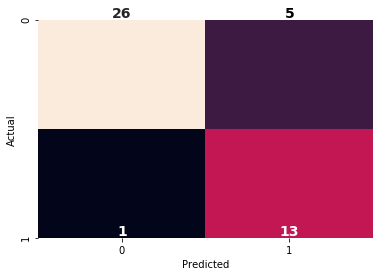

In [15]:
#Ploteo la matrix de confusión
import seaborn as sn
df_cm = pd.DataFrame(Matrix_OPT, index = [i for i in "01"],
                  columns = [i for i in "01"])

plt.figure(0.5)
heat_map = sn.heatmap(df_cm, xticklabels=True, yticklabels=True, annot=True, annot_kws = {"ha": 'center',"va": 'bottom'},cbar=False)
#heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')

for text in heat_map.texts:
    text.set_size(14)
    text.set_weight('bold')
    if text.get_text() == '5':
        text.set_color('black')


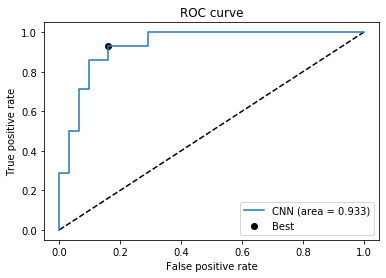

In [17]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.3f})'.format(auc_keras))
plt.scatter(fpr_keras[ix], tpr_keras[ix], marker='o', color='black', label='Best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

# CROSS-VALIDATION

In [18]:
y_pred_keras_tot = np.array([])
y_pred_rf_tot = np.array([])
y_test_total = np.array([])

xl_train, xl_test, yl_train, yl_test = train_test_split(LocalView.iloc[:,2:], LocalView.iloc[:,1], test_size=0.3, random_state=11)
xg_train, xg_test, yg_train, yg_test = train_test_split(GlobalView.iloc[:,2:], GlobalView.iloc[:,1], test_size=0.3, random_state=11)
xs_train, xs_test, ys_train, ys_test = train_test_split(StellarParam6P.iloc[:,2:], StellarParam6P.iloc[:,1], test_size=0.3, random_state=11)
    
   
    #Definimos las dimensiones
n_outputs = 1
nL_timesteps, nL_features  = xl_train.shape[0], xl_train.shape[1]
nG_timesteps, nG_features  = xg_train.shape[0], xg_train.shape[1]
nS_timesteps, nS_features  = xs_train.shape[0], xs_train.shape[1]
      
    #Expandimos las dimensiones
xle_train = np.expand_dims(xl_train,axis=-1) # axis=-3 para que se adapte a la forma del tensor
yle_train = np.array(yl_train) # Hay que trasponer 
xge_train = np.expand_dims(xg_train,axis=-1)
yge_train = np.array(yg_train)
xse_train = np.expand_dims(xs_train,axis=-1)
yse_train = np.array(ys_train)
    
    
    # Multiple Inputs

    # first input model
inputLocalView = Input(shape=(nL_features, 1))
inputLocalView.set_shape([nL_timesteps, nL_features, 1])

CL1 = Conv1D(filters=16, kernel_size=5, activation='relu')(inputLocalView)
CL2 = Conv1D(filters=16, kernel_size=5, activation='relu')(CL1)

ML1 = MaxPooling1D(pool_size=7, strides=2)(CL2)

CL3 = Conv1D(filters=32, kernel_size=5, activation='relu')(ML1)
CL4 = Conv1D(filters=32, kernel_size=5, activation='relu')(CL3)

ML2 = MaxPooling1D(pool_size=7, strides=2)(CL4)
flat1 = Flatten()(ML2)

    # second input model

inputGlobalView = Input(shape=(nG_features, 1))
inputGlobalView.set_shape([nG_timesteps, nG_features, 1])

CG1 = Conv1D(filters=16, kernel_size=5, activation='relu')(inputGlobalView)
CG2 = Conv1D(filters=16, kernel_size=5, activation='relu')(CG1)

MG1 = MaxPooling1D(pool_size=3, strides=2)(CG2)

CG3 = Conv1D(filters=32, kernel_size=5, activation='relu')(MG1)
CG4 = Conv1D(filters=32, kernel_size=5, activation='relu')(CG3)

MG2 = MaxPooling1D(pool_size=2, strides=2)(CG4)

CG5 = Conv1D(filters=64, kernel_size=5, activation='relu')(MG2)
CG6 = Conv1D(filters=64, kernel_size=5, activation='relu')(CG5)

MG3 = MaxPooling1D(pool_size=2, strides=2)(CG6)

CG7 = Conv1D(filters=128, kernel_size=3, activation='relu')(MG3)
CG8 = Conv1D(filters=128, kernel_size=3, activation='relu')(CG7)

MG4 = MaxPooling1D(pool_size=2, strides=2)(CG8)

flat2 = Flatten()(MG4)

    # third input model

StellarParam6PInput = Input(shape=(nS_features, 1))
StellarParam6PInput.set_shape([nS_timesteps, nS_features, 1])

    #StellarParam6PInput=(nS_features,1)
flat3 = Flatten()(StellarParam6PInput)
    # merge input models
merge = concatenate([flat1, flat2, flat3])

    # interpretation model
hidden1 = Dense(256, activation='relu')(merge)
hidden2 = Dense(256, activation='relu')(hidden1)
hidden3 = Dense(256, activation='relu')(hidden2)
hidden4 = Dense(256, activation='relu')(hidden3)
 #2output = Dense(n_outputs, activation='tanh')(hidden4)
output = Dense(n_outputs, activation='tanh')(hidden4)
model = Model(inputs=[inputLocalView, inputGlobalView,StellarParam6PInput], outputs=output)
    #loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'ce']
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    #loss_weights=['main_output': 1., 'aux_output': 0.2]) por si queremos darles pesos diferentes

batch_size=119

#Aumento número de muestras
for i in range(10):
    
    print(i)
    
    # Divido entre entrenamiento y test
    xl_train, xl_test, yl_train, yl_test = train_test_split(LocalView.iloc[:,2:], LocalView.iloc[:,1], test_size=0.3, random_state=11+i)
    xg_train, xg_test, yg_train, yg_test = train_test_split(GlobalView.iloc[:,2:], GlobalView.iloc[:,1], test_size=0.3, random_state=11+i)
    xs_train, xs_test, ys_train, ys_test = train_test_split(StellarParam6P.iloc[:,2:], StellarParam6P.iloc[:,1], test_size=0.3, random_state=11+i)
    
  
    # fit forma 2
    FIT = model.fit([xle_train, xge_train, xse_train], yle_train,
          epochs=50, batch_size=batch_size, verbose=0)
    
    xle_test = np.expand_dims(xl_test,axis=-1)
    yle_test = np.array(yl_test) 
    xge_test = np.expand_dims(xg_test,axis=-1)
    yge_test = np.array(yg_test)
    xse_test = np.expand_dims(xs_test,axis=-1)
    yse_test = np.array(ys_test)
    
    
    # Creo la RoC
    y_pred_kerasC = model.predict([xle_test,xge_test,xse_test]).ravel()
    
    
    #Lleno los vectores totales
    y_pred_keras_tot = np.concatenate((y_pred_keras_tot,y_pred_kerasC))
    
    y_test_total = np.concatenate((y_test_total,yle_test))

0
1
2
3
4
5
6
7
8
9


In [19]:
# Defino las métricas

fpr_kerasTotal, tpr_kerasTotal, thresholds_kerasTotal = roc_curve(y_test_total, y_pred_keras_tot)
auc_kerasTotal = auc(fpr_kerasTotal, tpr_kerasTotal)
gmeans = np.sqrt(tpr_kerasTotal * (1-fpr_kerasTotal))
# localiza el índice del mayor g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_kerasTotal[ix], gmeans[ix]))

Best Threshold=0.033286, G-Mean=0.897


In [20]:
#Umbral estándar
labels_Standart = (y_pred_keras_tot >= 0.5).astype(np.int)
PhiCoeff_Standart = matthews_corrcoef(y_test_total, labels_Standart)
Matrix_Standart = confusion_matrix(y_test_total, labels_Standart)
F_Measure_Standart = f1_score(y_test_total, labels_Standart, average='binary')

#Imprimo por pantalla las métricas
auc_kerasTotal, PhiM_Standart,F_Measure_Standart, print(Matrix_Standart)

[[337  16]
 [ 28  69]]


(0.9293536987821617, 0.6802313611192802, 0.7582417582417583, None)

In [21]:
#Umbral OPT
labels_OPT =(y_pred_keras_tot >= thresholds_kerasTotal[ix]).astype(np.int)
PhiCoeff_OPT = matthews_corrcoef(y_test_total, labels_OPT)
Matrix_OPT = confusion_matrix(y_test_total, labels_OPT)
F_Measure_OPT = f1_score(y_test_total, labels_OPT, average='binary')
Accuracy_OPT= accuracy_score(y_test_total, labels_OPT, normalize=True)
Recall_OPT= recall_score(y_test_total, labels_OPT, average=None)
Average_precision_OPT= average_precision_score(y_test_total, labels_OPT)


#Imprimo por pantalla las métricas
print("AUC:", auc_kerasTotal)
print("F_Measure:", F_Measure_OPT)
print("PhiCoeff:", PhiCoeff_OPT)
print("Average_precision:", Average_precision_OPT)
print("Accuracy:", Accuracy_OPT)
print("Recall:", Recall_OPT)
print("Matriz de confusión:")
print( Matrix_OPT)

AUC: 0.9293536987821617
F_Measure: 0.7962962962962962
PhiCoeff: 0.7394709115163688
Average_precision: 0.6651790888176576
Accuracy: 0.9022222222222223
Recall: [0.90651558 0.88659794]
Matriz de confusión:
[[320  33]
 [ 11  86]]


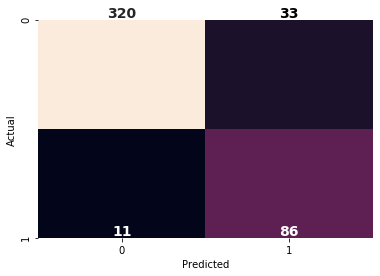

In [24]:
#Ploteo la matrix de confusión

df_cm_OPT = pd.DataFrame(Matrix_OPT, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(0.5)
heat_map = sn.heatmap(df_cm_OPT, xticklabels=True, yticklabels=True, annot=True, fmt='g', annot_kws = {"ha": 'center',"va": 'bottom'},cbar=False)
#heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')

for text in heat_map.texts:
    text.set_size(14)
    text.set_weight('bold')
    if text.get_text() == '33':
        text.set_color('black')

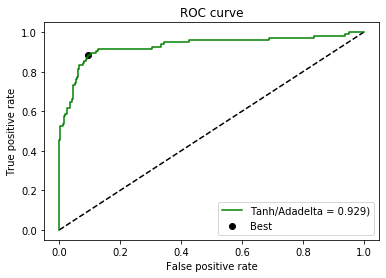

In [23]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_kerasTotal, tpr_kerasTotal,  color='green', label='Tanh/Adadelta = {:.3f})'.format(auc_kerasTotal))
plt.scatter(fpr_kerasTotal[ix], tpr_kerasTotal[ix], marker='o', color='black', label='Best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()